In [1]:
%run -i setup_RHI

c:\Users\renat\PhD\RHI\SCZ_RHI_RBM\Dev\GRBM_RHI.py:467: RuntimeWarning: overflow encountered in exp
  elambda = 1.0 -np.exp(slope*(d-dCp))/(1.0 +np.exp(slope*(d-dCp)))
c:\Users\renat\PhD\RHI\SCZ_RHI_RBM\Dev\GRBM_RHI.py:467: RuntimeWarning: invalid value encountered in double_scalars
  elambda = 1.0 -np.exp(slope*(d-dCp))/(1.0 +np.exp(slope*(d-dCp)))

IPython CPU timings (estimated):
  User   :     539.16 s.
  System :       0.00 s.
Wall time:     539.16 s.


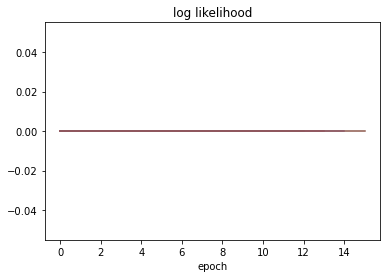

In [2]:
%run -i -t train_RHI

<Figure size 432x288 with 0 Axes>

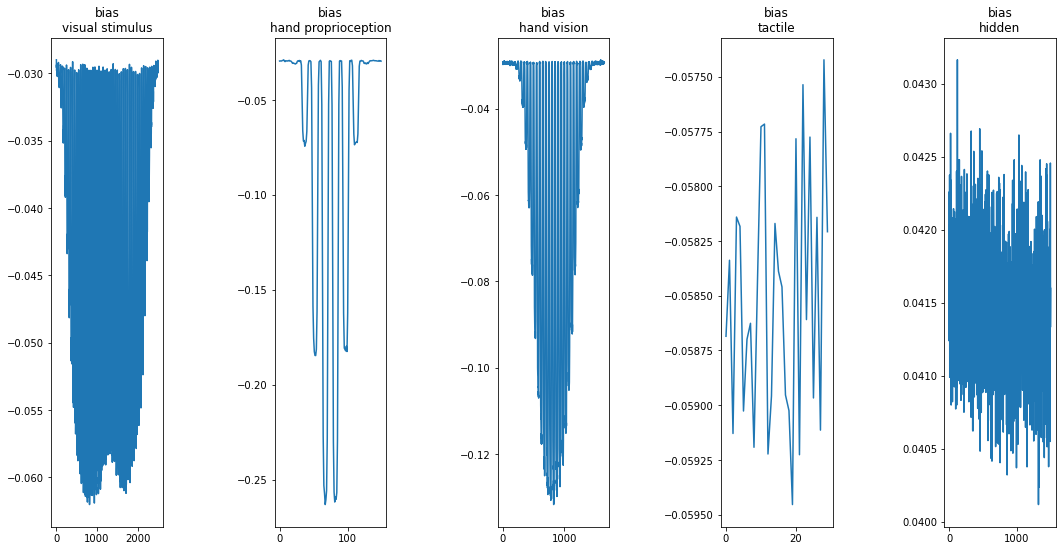

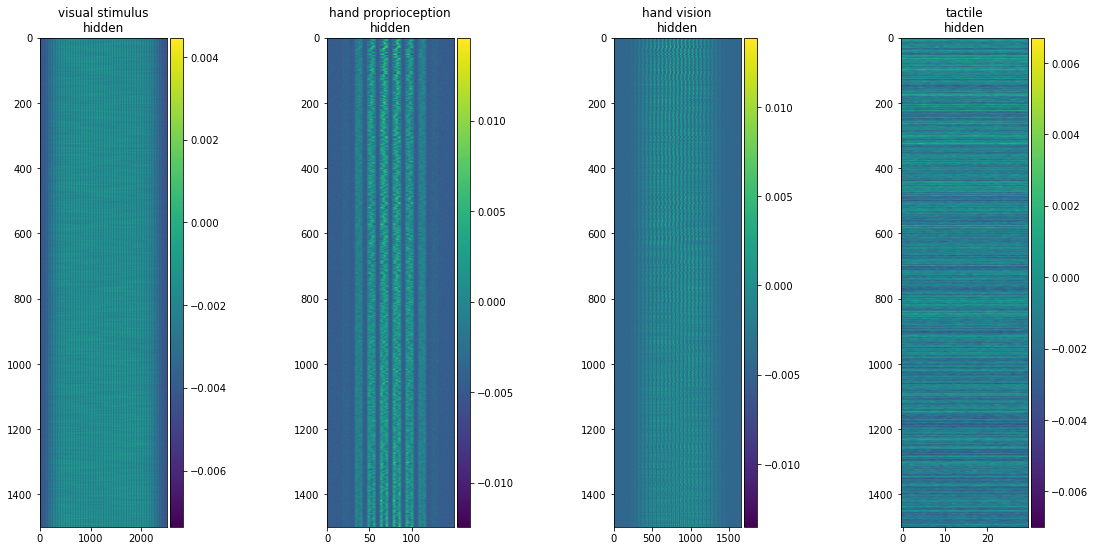

In [3]:
myw,myor = g.showPars(True)

In [4]:
ntrials=10000
nsteps=1
nGridPoints=17

pBcs_T=np.zeros((ntrials,2))
pHs_T=np.zeros((ntrials,2))
pHcs_T=np.zeros((ntrials,2)) 
Ts_T=np.zeros(ntrials)

for i in np.arange(ntrials):
    if (i%500)==0:print(i)
    pBc=g.NeuronInfo[0].min+np.multiply(g.NeuronInfo[0].max-g.NeuronInfo[0].min,np.random.rand(2))
    pH=g.NeuronInfo[1].min+np.multiply(g.NeuronInfo[1].max-g.NeuronInfo[1].min,np.random.rand(2))
    gains=4+6*np.random.rand(4)
    Bc,H,V,T=stimgenGainsExact_correctDecoupled(pBc,pH,pH,g.NeuronInfo,gains)
    
    T=0*T
    g.V[0].S=Bc
    g.V[1].S=H
    g.V[2].S=V
    g.V[3].S=T

    for s in np.arange(nsteps):
        g.up()
        g.H[0].S=g.H[0].MU
        g.down()
        g.V[0].S=Bc
        g.V[1].S=H
    
    pBcs_T[i,:]=pBc
    pHs_T[i,:]=pH
    pHcs_T[i,:]=pBc-pH
    Ts_T[i]=np.nanmean(g.V[3].MU)

0
c:\Users\renat\PhD\RHI\SCZ_RHI_RBM\Dev\GRBM_RHI.py:467: RuntimeWarning: overflow encountered in exp
  elambda = 1.0 -np.exp(slope*(d-dCp))/(1.0 +np.exp(slope*(d-dCp)))
c:\Users\renat\PhD\RHI\SCZ_RHI_RBM\Dev\GRBM_RHI.py:467: RuntimeWarning: invalid value encountered in double_scalars
  elambda = 1.0 -np.exp(slope*(d-dCp))/(1.0 +np.exp(slope*(d-dCp)))
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


In [5]:
ntrials=10000
nsteps=1
nGridPoints=17

pBcs_TO=np.zeros((ntrials,2))
pHs_TO=np.zeros((ntrials,2))
pHcs_TO=np.zeros((ntrials,2))
Ts_TO=np.zeros(ntrials)

for i in np.arange(ntrials):
    if (i%500)==0:print(i)

    pBc=g.NeuronInfo[0].min+np.multiply(g.NeuronInfo[0].max-g.NeuronInfo[0].min,np.random.rand(2))
    pH=g.NeuronInfo[1].min+np.multiply(g.NeuronInfo[1].max-g.NeuronInfo[1].min,np.random.rand(2))
    gains=4+6*np.random.rand(4)
    Bc,H,V,T=stimgenGainsExact_correctDecoupled(pBc,pH,pH,g.NeuronInfo,gains)
    
    T=0*T
    V=0*V
    g.V[0].S=Bc
    g.V[1].S=H
    g.V[2].S=V
    g.V[3].S=T

    for s in np.arange(nsteps):
        g.up()
        g.H[0].S=g.H[0].MU
        g.down()
        g.V[0].S=Bc
        g.V[1].S=H
    
    pBcs_TO[i,:]=pBc
    pHs_TO[i,:]=pH
    pHcs_TO[i,:]=pBc-pH
    Ts_TO[i]=np.nanmean(g.V[3].MU)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


c:\Users\renat\PhD\RHI\SCZ_RHI_RBM\Dev\GRBM_RHI.py:495: RuntimeWarning: Mean of empty slice
  grid[i,j]=np.nanmean( z [np.where((indX==(j+1))*(indY==(i+1)))] )
C:\Users\renat\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


<Figure size 432x288 with 0 Axes>

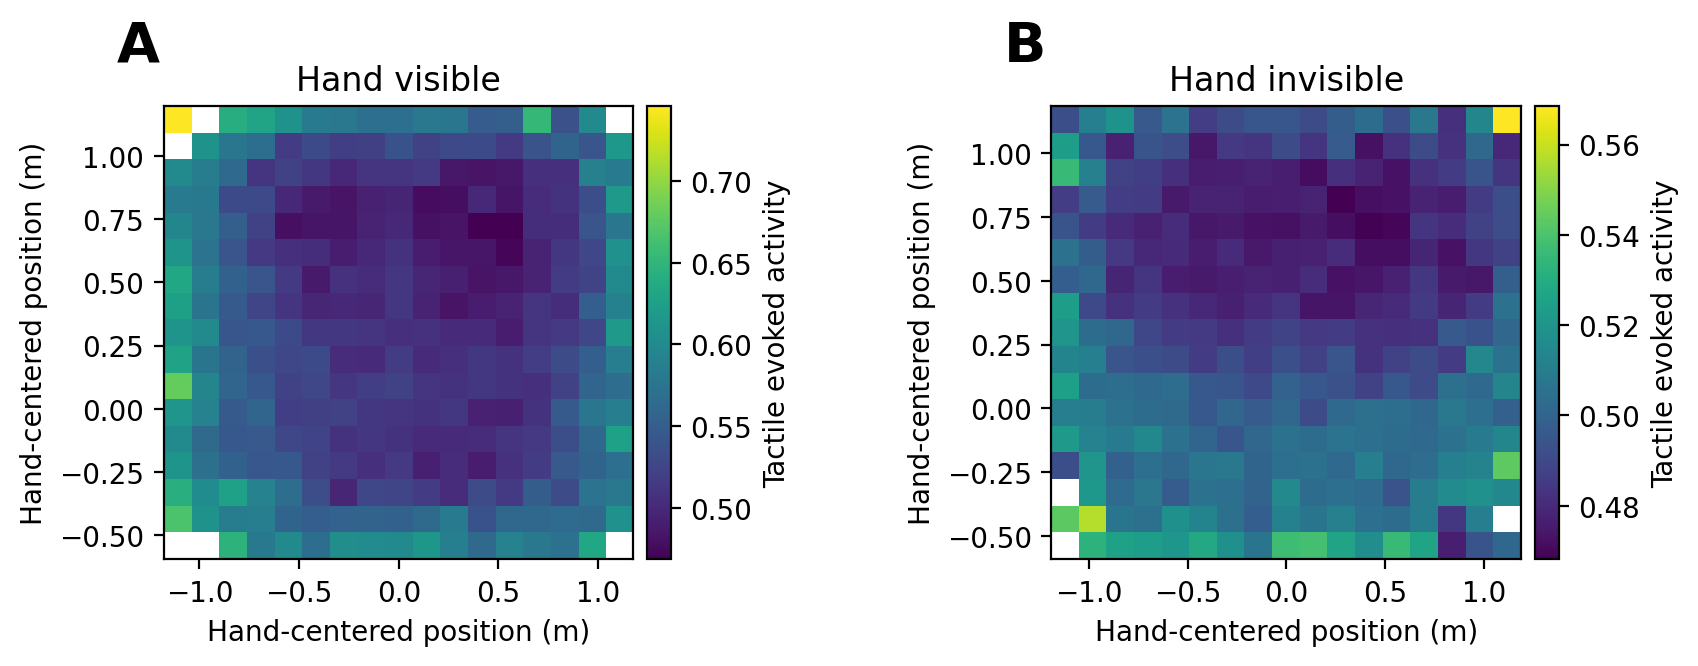

In [6]:
def extents(f):
# https://gist.github.com/fasiha/eff0763ca25777ec849ffead370dc907
  delta = f[1] - f[0]
  return [f[0] - delta/2, f[-1] + delta/2]

plt.figure(3)
fig, axs = plt.subplots(1, 2, figsize=(9, 3),dpi = 200)
ax1 = plt.subplot(121)
grid,xc,yc,_,_=bindata2d(pHcs_T[:,0],pHcs_T[:,1],Ts_T,nGridPoints)
im1=ax1.imshow(grid, aspect='auto', interpolation='none',
           extent=extents(xc) + extents(yc), origin='lower')
ax1.set_xlabel('Hand-centered position (m)');
ax1.set_ylabel('Hand-centered position (m)');
ax1.set_title('Hand visible');
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
fig.colorbar(im1, cax=cax,label='Tactile evoked activity');
ax1.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax1.transAxes, 
                size=20, weight='bold')

ax2 = plt.subplot(122)
grid,xc,yc,_,_=bindata2d(pHcs_TO[:,0],pHcs_TO[:,1],Ts_TO,nGridPoints)
im2=ax2.imshow(grid, aspect='auto', interpolation='none',
           extent=extents(xc) + extents(yc), origin='lower')
ax2.set_xlabel('Hand-centered position (m)');
ax2.set_ylabel('Hand-centered position (m)');
ax2.set_title('Hand invisible');
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
fig.colorbar(im2, cax=cax,label='Tactile evoked activity');
ax2.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax2.transAxes, 
                size=20, weight='bold')

fig.subplots_adjust(wspace=0.75)      

c:\Users\renat\PhD\RHI\SCZ_RHI_RBM\Dev\GRBM_RHI.py:467: RuntimeWarning: overflow encountered in exp
  elambda = 1.0 -np.exp(slope*(d-dCp))/(1.0 +np.exp(slope*(d-dCp)))
c:\Users\renat\PhD\RHI\SCZ_RHI_RBM\Dev\GRBM_RHI.py:467: RuntimeWarning: invalid value encountered in double_scalars
  elambda = 1.0 -np.exp(slope*(d-dCp))/(1.0 +np.exp(slope*(d-dCp)))
c:\Users\renat\PhD\RHI\SCZ_RHI_RBM\Dev\GRBM_RHI.py:467: RuntimeWarning: overflow encountered in exp
  elambda = 1.0 -np.exp(slope*(d-dCp))/(1.0 +np.exp(slope*(d-dCp)))
c:\Users\renat\PhD\RHI\SCZ_RHI_RBM\Dev\GRBM_RHI.py:467: RuntimeWarning: invalid value encountered in double_scalars
  elambda = 1.0 -np.exp(slope*(d-dCp))/(1.0 +np.exp(slope*(d-dCp)))
train_RHI.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, 

<Figure size 432x288 with 0 Axes>

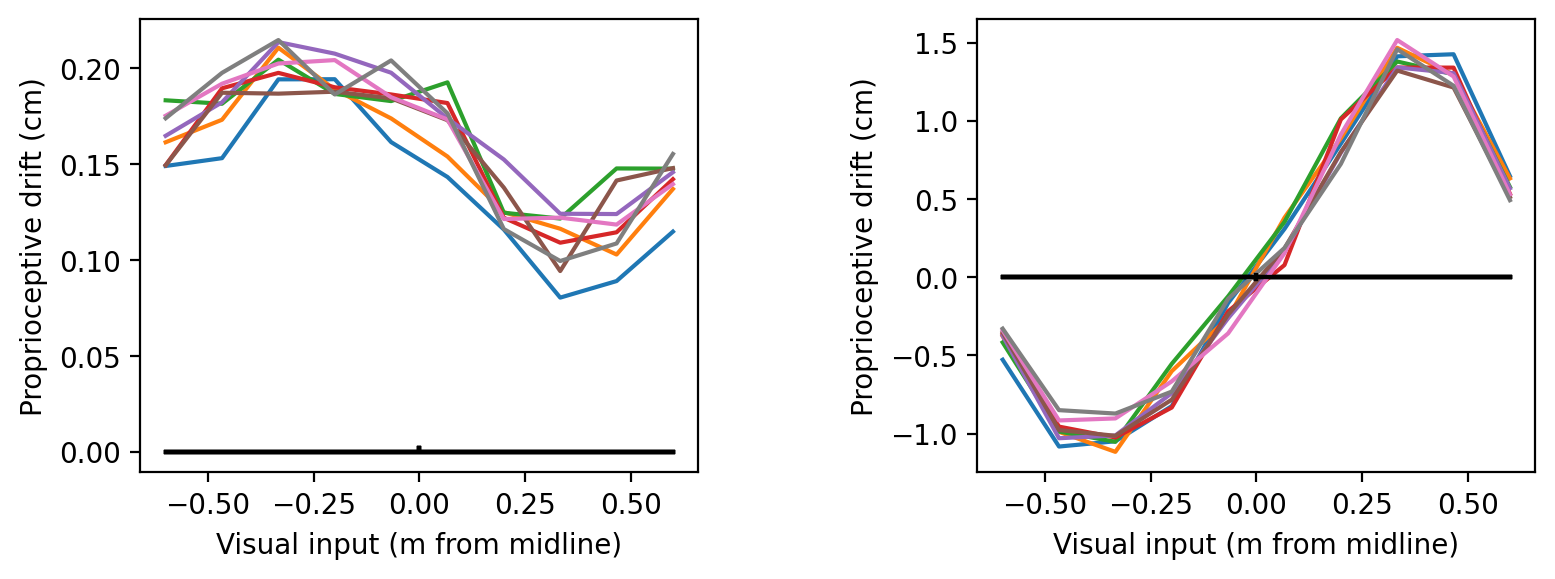

In [8]:
plt.figure(4)
fig, axs = plt.subplots(1, 2, figsize=(9, 3),dpi = 200)

nPos=10
nRep=500
ntrials=nPos*nRep
nsteps=1
NV=g.NV
pBcs=np.zeros((ntrials,2))
pHs=np.zeros(ntrials)
pHcs=np.zeros((ntrials,2))
Ts=np.zeros(ntrials)
rBcs=np.zeros((g.NV[0],ntrials))
rHs=np.zeros((g.NV[1],ntrials))

positions=np.linspace(g.NeuronInfo[0].min[0],g.NeuronInfo[0].max[0],nPos)
tStrengths=np.concatenate((0,np.arange(4,10+1)),axis=None)
maxPDs=np.zeros(np.size(tStrengths))
#colours=[0,0,0;jet( np.size(tStrengths-1) )]
tFlag=Ts
pH=[0,0.25]

for ts in np.arange(np.size(tStrengths)):
    tStrength=tStrengths[ts]
    count=0
    for p in np.arange(nPos):
        stims=np.zeros((np.sum(g.NV),nRep)) #again stimuli are noiseless since we only care about averages here
        for r in np.arange(nRep):
            count=count+1
            y=.6*np.random.rand()
            pBc=np.array([positions[p],y])
            pH=np.array([0,y])
            gains=4+6*np.random.rand(4)
            Bc,H,V,T=stimgenGainsExact_correctDecoupled(pBc,pH,pH,g.NeuronInfo,gains)
            T=tStrength+0*T
            V=0*V
            stims[:,r]=np.concatenate((Bc, H, V, T), axis=None)
            pBcs[count-1,:]=pBc
            pHs[count-1]=pH[0]
            pHcs[count-1,:]=pBc-pH
        
        for s in np.arange(nsteps):
            _,h=g.fastUp(stims)
            _,v=g.fastDown(h)
            stims[g.NV[0]:g.NV[0]+g.NV[1],:]=v[g.NV[0]:g.NV[0]+g.NV[1],:]
        cols=np.arange(nRep)+(p)*nRep
        rHs[:,cols]=v[g.NV[0]:g.NV[0]+g.NV[1],:]
        rBcs[:,cols]=v[:g.NV[0],:]
    
    touchedH=np.zeros((g.NV[1],nPos))
    nTouchedH=touchedH
    touchedBc=np.zeros((g.NV[0],nPos))
    nTouchedBc=touchedBc
    m=np.ceil(np.sqrt(nPos))
    n=np.round(nPos/m)
    tp=np.zeros((nRep,nPos))
    ntp=[]
    wx,wy=np.meshgrid(np.arange(g.NeuronInfo[1].n[0],dtype=float),np.arange(g.NeuronInfo[1].n[1],dtype=float))
    
    for p in np.arange(nPos):
        cols=np.arange(nRep)+(p)*nRep
        touchedH[:,p]=np.nanmean(rHs[:,cols],1)
        touchedBc[:,p]=np.mean(rBcs[:,cols],1)
        hCurr=rHs[:,cols]
        
        for i in np.arange(np.shape(hCurr)[1]):
            w=np.flipud(np.rot90(np.reshape(hCurr[:,i],g.NeuronInfo[1].n)))
            barX=np.sum(np.multiply(w,wx))/np.sum(w.ravel(order='F'))
            barY=np.sum(np.multiply(w,wy))/np.sum(w.ravel(order='F'))
            tp[i,p]=barX
                    
    ax1=plt.subplot(121)
    err=g.NeuronInfo[1].span[0]*np.nanstd(tp)/(g.NeuronInfo[1].n[0]*np.sqrt(np.shape(tp)[0]))
    y=indToPos(np.array([np.nanmean(tp,axis=0),0*np.nanmean(tp,axis=0)]).T,g.NeuronInfo[1]) #double check the output of indToPos. 
    y=y[:,0].conj().T
    maxPDs[ts]=np.max(y)
    ax1.plot(positions, 100*y) #, 'LineWidth',2,'color',colours(ts,:));
    ax1.plot(positions,np.zeros(np.shape(positions)),'k')    #'--','LineWidth',2,'color','k')
    ax1.plot([0,0],[np.min(y),np.max(y)],'k') #,'--','LineWidth',2,'color','k')
    ax1.set_xlabel('Visual input (m from midline)')
    ax1.set_ylabel('Proprioceptive drift (cm)')

###################################################################
nPos=10
nRep=500
ntrials=nPos*nRep
nsteps=1
NV=g.NV
pBcs=np.zeros((ntrials,2))
pHs=np.zeros(ntrials)
pHcs=np.zeros((ntrials,2))
Ts=np.zeros(ntrials)
rBcs=np.zeros((g.NV[0],ntrials))
rHs=np.zeros((g.NV[1],ntrials))

positions=np.linspace(g.NeuronInfo[0].min[0],g.NeuronInfo[0].max[0],nPos)
tStrengths=np.concatenate((0,np.arange(4,10+1)),axis=None)
maxPDs=np.zeros(np.size(tStrengths))
#colours=[0,0,0;jet( np.size(tStrengths-1) )]
tFlag=Ts
pH=[0,0.25]

for ts in np.arange(np.size(tStrengths)):
    tStrength=tStrengths[ts]
    count=0
    for p in np.arange(nPos):
        stims=np.zeros((np.sum(g.NV),nRep)) #again stimuli are noiseless since we only care about averages here
        for r in np.arange(nRep):
            count=count+1
            y=.6*np.random.rand()
            pBc=np.array([positions[p],y])
            pHv=pBc
            pHp=[0,y]
            gains=4+6*np.random.rand(4)
            Bc,H,V,T=stimgenGainsExact_correctDecoupled(pBc,pHp,pHv,g.NeuronInfo,gains)
            T=tStrength+0*T
            stims[:,r]=np.concatenate((Bc, H, V, T), axis=None)
            pBcs[count-1,:]=pBc
            pHs[count-1]=pH[0]
            pHcs[count-1,:]=pBc-pHp
        
        for s in np.arange(nsteps):
            _,h=g.fastUp(stims)
            _,v=g.fastDown(h)
            stims[g.NV[0]:g.NV[0]+g.NV[1],:]=v[g.NV[0]:g.NV[0]+g.NV[1],:]
        cols=np.arange(nRep)+(p)*nRep
        rHs[:,cols]=v[g.NV[0]:g.NV[0]+g.NV[1],:]
        rBcs[:,cols]=v[:g.NV[0],:]
    
    touchedH=np.zeros((g.NV[1],nPos))
    nTouchedH=touchedH
    touchedBc=np.zeros((g.NV[0],nPos))
    nTouchedBc=touchedBc
    m=np.ceil(np.sqrt(nPos))
    n=np.round(nPos/m)
    tp=np.zeros((nRep,nPos))
    ntp=[]
    wx,wy=np.meshgrid(np.arange(g.NeuronInfo[1].n[0],dtype=float),np.arange(g.NeuronInfo[1].n[1],dtype=float))
    
    for p in np.arange(nPos):
        cols=np.arange(nRep)+(p)*nRep
        touchedH[:,p]=np.nanmean(rHs[:,cols],1)
        touchedBc[:,p]=np.mean(rBcs[:,cols],1)
        hCurr=rHs[:,cols]
        
        for i in np.arange(np.shape(hCurr)[1]):
            w=np.flipud(np.rot90(np.reshape(hCurr[:,i],g.NeuronInfo[1].n)))
            barX=np.sum(np.multiply(w,wx))/np.sum(w.ravel(order='F'))
            barY=np.sum(np.multiply(w,wy))/np.sum(w.ravel(order='F'))
            tp[i,p]=barX
                    
    ax2=plt.subplot(122)
    err=g.NeuronInfo[1].span[0]*np.nanstd(tp)/(g.NeuronInfo[1].n[0]*np.sqrt(np.shape(tp)[0]))
    y=indToPos(np.array([np.nanmean(tp,axis=0),0*np.nanmean(tp,axis=0)]).T,g.NeuronInfo[1]) #double check the output of indToPos. 
    y=y[:,0].conj().T
    maxPDs[ts]=np.max(y)
    ax2.plot(positions, 100*y) #, 'LineWidth',2,'color',colours(ts,:));
    ax2.plot(positions,np.zeros(np.shape(positions)),'k')    #'--','LineWidth',2,'color','k')
    ax2.plot([0,0],[np.min(y),np.max(y)],'k') #,'--','LineWidth',2,'color','k')
    ax2.set_xlabel('Visual input (m from midline)')
    ax2.set_ylabel('Proprioceptive drift (cm)')

    fig.subplots_adjust(wspace=0.5)